In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

In [2]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.utils.data import get_outliers_inliers
from sklearn.preprocessing import MinMaxScaler

In [3]:
# reading the dataset
df = pd.read_csv("rca.csv")

<AxesSubplot:xlabel='latency', ylabel='source'>

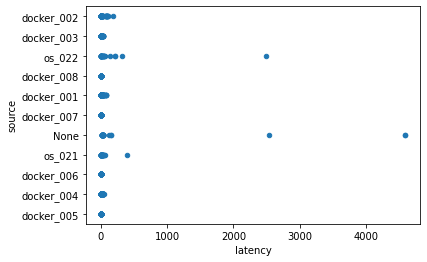

In [4]:
df.plot.scatter('latency', 'source')

In [5]:
le = preprocessing.LabelEncoder()
le.fit(df['source'])
LabelEncoder()
list(le.classes_)
sourceTranformed = le.transform(df['source'])
print(sourceTranformed)
print(df['latency'])

[5 5 5 ... 7 1 1]
0        4
1        2
2        2
3       40
4        0
        ..
2095     3
2096     3
2097     1
2098    14
2099     0
Name: latency, Length: 2100, dtype: int64


In [6]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# df[['latency']] = scaler.fit_transform(df[['latency']])
# sourceTranformed = scaler.fit_transform(sourceTranformed)

In [7]:
X1 = df['latency'].values.reshape(-1,1)
X2 = sourceTranformed.reshape(-1,1)

print(X1)
print(X2)

X = np.concatenate((X1,X2), axis=1)

[[ 4]
 [ 2]
 [ 2]
 ...
 [ 1]
 [14]
 [ 0]]
[[5]
 [5]
 [5]
 ...
 [7]
 [1]
 [1]]


In [8]:
outliers_fraction = 0.2
# Test 4 different methods
classifiers = {
        'ABOD': ABOD(contamination=outliers_fraction),
        'KNN': KNN(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'IForest': IForest(contamination=outliers_fraction)
}

In [9]:
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
plt.figure(figsize=(10, 10))

for i, (clf_name, clf) in enumerate (classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    ZZ = Z.reshape(xx.shape)

    # plot outliers and contour
    subplot = plt .subplot(2, 2, i + 1)
    subplot.contour(xx, yy, ZZ, levels = np.linspace(Z.min(), threshold, 15))
    subplot.contour(xx, yy, ZZ, levels = [threshold], linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contour(xx, yy, ZZ, levels=[threshold, Z.max()], colors='blue')

    # scatter plot of inliers with white dots
    subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white', s=12, edgecolor='g')
    # scatter plot of outliers with black dots
    subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='black', s=12, edgecolor='g')
    subplot.axis('tight')

    subplot.set_title(clf_name)
    subplot.set_xlim((-15, 15))
    subplot.set_ylim((-15, 15))
plt.show()


C:\Users\licen\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\licen\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\licen\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function dot at 0x00000197BCA88D30>) found for signature:
 
 >>> dot(array(int64, 1d, C), array(int64, 1d, C))
 
There are 4 candidate implementations:
[1m  - Of which 4 did not match due to:
  Overload in function '_OverloadWrapper._build.<locals>.ol_generated': File: numba\core\overload_glue.py: Line 131.
    With argument(s): '(array(int64, 1d, C), array(int64, 1d, C))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1mNo implementation of function Function(<intrinsic stub>) found for signature:
    
    >>> stub(array(int64, 1d, C), array(int64, 1d, C))
    
   There are 2 candidate implementations:
   [1m  - Of which 2 did not match due to:
     Intrinsic in function 'stub': File: numba\core\overload_glue.py: Line 35.
       With argument(s): '(array(int64, 1d, C), array(int64, 1d, C))':[0m
   [1m   Rejected as the implementation raised a specific error:
        TypingError: [1mnp.dot() only supported on float and complex arrays[0m[0m
     raised from C:\Users\licen\AppData\Roaming\Python\Python310\site-packages\numba\core\typing\npydecl.py:970
   [0m
   [0m[1mDuring: resolving callee type: Function(<intrinsic stub>)[0m
   [0m[1mDuring: typing of call at <string> (3)
   [0m
   [1m
   File "<string>", line 3:[0m
   [1m<source missing, REPL/exec in use?>[0m
[0m
  raised from C:\Users\licen\AppData\Roaming\Python\Python310\site-packages\numba\core\typeinfer.py:1086
[0m
[0m[1mDuring: resolving callee type: Function(<function dot at 0x00000197BCA88D30>)[0m
[0m[1mDuring: typing of call at c:\workspace\anomalydetetion\pyod\models\abod.py (50)
[0m
[1m
File "pyod\models\abod.py", line 50:[0m
[1mdef _wcos(curr_pt, a, b):  # pragma: no cover
    <source elided>
    # wcos = (<a_curr, b_curr>/((|a_curr|*|b_curr|)^2)
[1m    wcos = np.dot(a_curr, b_curr) / (
[0m    [1m^[0m[0m


<Figure size 720x720 with 0 Axes>